<p style="font-family: Arial; font-size:3.7em; color:purple; font-style:bold">
<br>FANAL RESULTS SHOWCASE<br></p>

This notebook illustrates the results got from FANAL analysis.

It provides contents of generated DataFrames with some associated plots.

#### Setting general stuff

In [1]:
from IPython.core.display import HTML
css = open('css/style-table.css').read() + open('css/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

#### Importings

In [4]:
import os
import sys
import numpy  as np
import tables as tb
import pandas as pd
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm

#%matplotlib widget

In [5]:
# Specific IC stuff

import invisible_cities.core.system_of_units  as units

In [6]:
# Specific FANAL stuff

from fanal.containers.events import Event
from fanal.containers.events import EventCounter
from fanal.containers.tracks import Track

In [7]:
plt.rcParams["figure.figsize"] = 8, 6
plt.rcParams["font.size"     ] = 14

# LOADING DATA

In [8]:
#results_fname = '/Users/Javi/Development/FANAL/fanal/fanal.tst.h5'

iPATH         = "../data/next100"
#results_fname = iPATH + "/Bi214/fanal/fanal.next100.Bi214.fwhm_05.voxel_3x3x3.h5"
#results_fname = iPATH + "/Bi214/fanal/fanal.next100.Bi214.fwhm_07.voxel_10x10x10.h5"
#results_fname = iPATH + "/Tl208/fanal/fanal.next100.Tl208.fwhm_05.voxel_3x3x3.h5"
#results_fname = iPATH + "/Tl208/fanal/fanal.next100.Tl208.fwhm_07.voxel_10x10x10.h5"
results_fname = iPATH + "/bb0nu/fanal/fanal.next100.bb0nu.fwhm_05.voxel_3x3x3.h5"
#results_fname = iPATH + "/bb0nu/fanal/fanal.next100.bb0nu.fwhm_07.voxel_10x10x10.h5"

In [9]:
config_df  = pd.read_hdf(results_fname, "FANAL" + '/config')
events_df  = pd.read_hdf(results_fname, "FANAL" + '/events')
tracks_df  = pd.read_hdf(results_fname, "FANAL" + '/tracks')
voxels_df  = pd.read_hdf(results_fname, "FANAL" + '/voxels')
results_df = pd.read_hdf(results_fname, "FANAL" + '/results')

In [10]:
print("Configuration run ...")
config_df

Configuration run ...


,value
det_name,NEXT100
event_type,bb0nu
input_fname,../data/next100/bb0nu/sim/*.h5
output_fname,../data/next100/bb0nu/fanal/fanal.next100.bb0n...
buffer_Eth,0.0
trans_diff,0.0
long_diff,0.0
fwhm,0.006999999999999999
e_min,2.4
e_max,2.5


# EVENT counters

In [11]:
results_df

,events
simulated,500
stored,500
analyzed,500
mc_filter,357
energy_filter,357
fiduc_filter,313
track_filter,231
blob_filter,194
roi_filter,128


In [12]:
print(EventCounter(**results_df.events))

* Event counters ...
  Simulated    :        500  (1.00e+00)
  Stored       :        500  (1.00e+00)
  Analyzed     :        500  (1.00e+00)
  MC     filter:        357  (7.14e-01)
  Energy filter:        357  (7.14e-01)
  Fiduc. filter:        313  (6.26e-01)
  Track  filter:        231  (4.62e-01)
  Blob   filter:        194  (3.88e-01)
  ROI    filter:        128  (2.56e-01)



In [13]:
# Accessing a single value
print(f"Num events that passed the ROI filter: {results_df.loc['roi_filter'].events}")

Num events that passed the ROI filter: 128


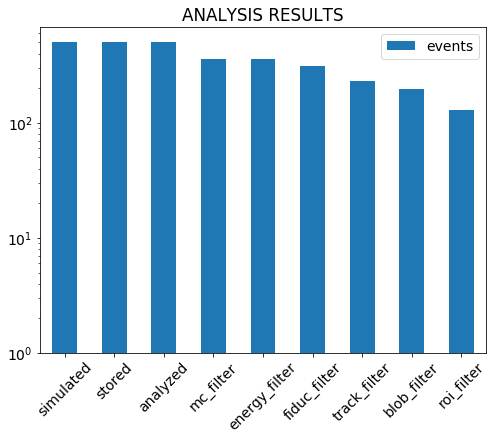

In [14]:
results_df.plot.bar(title = 'ANALYSIS RESULTS', rot=45, log=True)

# DataFrames

In [15]:
evt_cols_to_show = ['mc_energy', 'mc_filter', 'sm_energy', 'energy_filter', 'num_voxels', 'fiduc_filter',
                    'num_tracks', 'track_length', 'track_filter', 'blob1_energy', 'blob2_energy',
                    'blob_filter', 'roi_filter']

In [16]:
# Showing the desired columns from first events
events_df[evt_cols_to_show].head()

,mc_energy,mc_filter,sm_energy,energy_filter,num_voxels,fiduc_filter,num_tracks,track_length,track_filter,blob1_energy,blob2_energy,blob_filter,roi_filter
event_id,,,,,,,,,,,,,
0,2.457830,True,2.453856,True,18,True,1,82.925287,True,1.021097,0.836346,True,False
1,2.457830,True,2.456342,True,25,True,1,107.067423,True,0.710483,0.643837,True,True
2,1.020527,False,NaN,False,-1,False,-1,NaN,False,NaN,NaN,False,False
3,2.328514,False,NaN,False,-1,False,-1,NaN,False,NaN,NaN,False,False
4,2.457830,True,2.449920,True,23,True,3,NaN,False,NaN,NaN,False,False


In [17]:
# Showing just the events that passed the TRACK filter
events_df[events_df.track_filter][evt_cols_to_show]

,mc_energy,mc_filter,sm_energy,energy_filter,num_voxels,fiduc_filter,num_tracks,track_length,track_filter,blob1_energy,blob2_energy,blob_filter,roi_filter
event_id,,,,,,,,,,,,,
0,2.45783,True,2.453856,True,18,True,1,82.925287,True,1.021097,0.836346,True,False
1,2.45783,True,2.456342,True,25,True,1,107.067423,True,0.710483,0.643837,True,True
5,2.45783,True,2.462123,True,18,True,1,118.031186,True,0.815584,0.729341,True,True
7,2.45783,True,2.457054,True,24,True,1,65.604779,True,1.040019,0.510957,True,True
10,2.45783,True,2.451731,True,17,True,1,55.604779,True,1.362284,0.912924,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2.45783,True,2.465376,True,19,True,1,79.282032,True,0.996292,0.777451,True,True
491,2.45783,True,2.465575,True,21,True,1,108.031186,True,1.306793,0.644575,True,True
493,2.45783,True,2.456989,True,17,True,1,75.604779,True,0.947139,0.846070,True,True


In [18]:
# Showing first tracks
tracks_df.head()

energy      length  num_voxels     blob1_x     blob1_y  \
event_id track_id                                                             
0        0         2.453856   82.925287          18  334.422009 -293.837105   
1        0         2.456342  107.067423          25  180.922456  336.753514   
4        0         2.205143   97.067423          20         NaN         NaN   
         1         0.145430    0.000000           1         NaN         NaN   
         2         0.099347   10.000000           2         NaN         NaN   

                      blob1_z  blob1_energy  blob1_num_hits     blob2_x  \
event_id track_id                                                         
0        0         158.979311      1.021097             134  314.678711   
1        0         756.130707      0.710483              83  141.365537   
4        0                NaN           NaN               0         NaN   
         1                NaN           NaN               0         NaN   
         2                NaN           NaN               0         NaN   

                      blob2_y     blob2_z  blob2_energy  blob2_num_hits  \
event_id track_id                                                         
0        0        -312.846713  219.475003      0.836346             100   
1        0         358.011639  783.276210      0.643837              93   
4        0                NaN         NaN           NaN               0   
         1                NaN         NaN           NaN               0   
         2                NaN         NaN           NaN               0   

                   ovlp_energy  
event_id track_id               
0        0                 0.0  
1        0                 0.0  
4        0                 NaN  
         1                 NaN  
         2                 NaN

In [19]:
# Showing first voxels
voxels_df.head()

x          y           z    energy
event_id track_id voxel_id                                             
0        0        0         314.150543 -316.16713  197.001541  0.038360
                  1         314.150543 -316.16713  207.001541  0.029124
                  2         314.150543 -316.16713  217.001541  0.367572
                  3         314.150543 -306.16713  197.001541  0.054326
                  4         314.150543 -306.16713  207.001541  0.075030

# Some graphics

Text(0.5, 1.0, 'Number of reconstructed tracks')

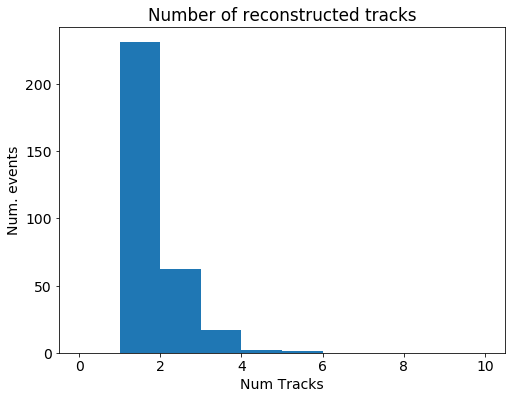

In [20]:
max_num_trks = 10
plt.hist(events_df.num_tracks, max_num_trks, [0, max_num_trks])
plt.xlabel('Num Tracks')
plt.ylabel('Num. events')
plt.title('Number of reconstructed tracks')

Text(0.5, 1.0, 'Track - Length')

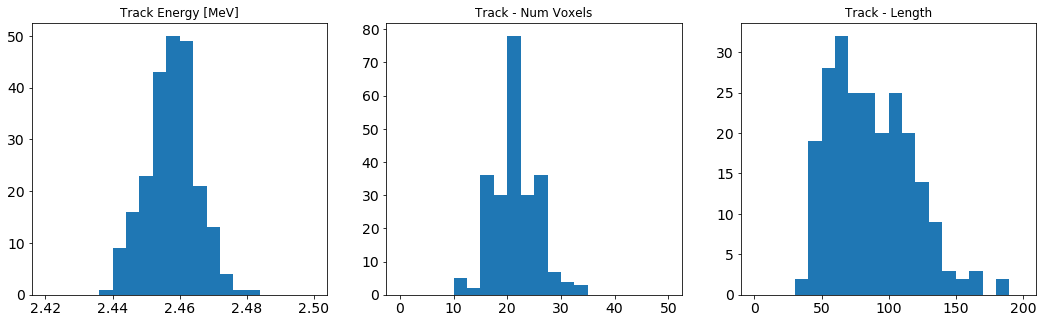

In [21]:
# Plotting energy, length and number of voxels of single track events
evts_to_show = events_df[events_df.num_tracks == 1]

fig = plt.figure(figsize = (18, 5))
E_bins, E_range           = 20, [2.42, 2.50]
voxels_bins, voxels_range = 20, [0, 50]
length_bins, length_range = 20, [0, 200]

# First track plots
ax1 = fig.add_subplot(1, 3, 1)
plt.hist(evts_to_show.sm_energy, E_bins, E_range)
plt.title('Track Energy [MeV]', size=12)

ax2 = fig.add_subplot(1, 3, 2)
plt.hist(evts_to_show.num_voxels, voxels_bins, voxels_range)
plt.title('Track - Num Voxels', size=12)

ax3 = fig.add_subplot(1, 3, 3)
plt.hist(evts_to_show.track_length, length_bins, length_range)
plt.title('Track - Length', size=12)

Text(0.5, 1.0, 'Blob Energies [MeV]')

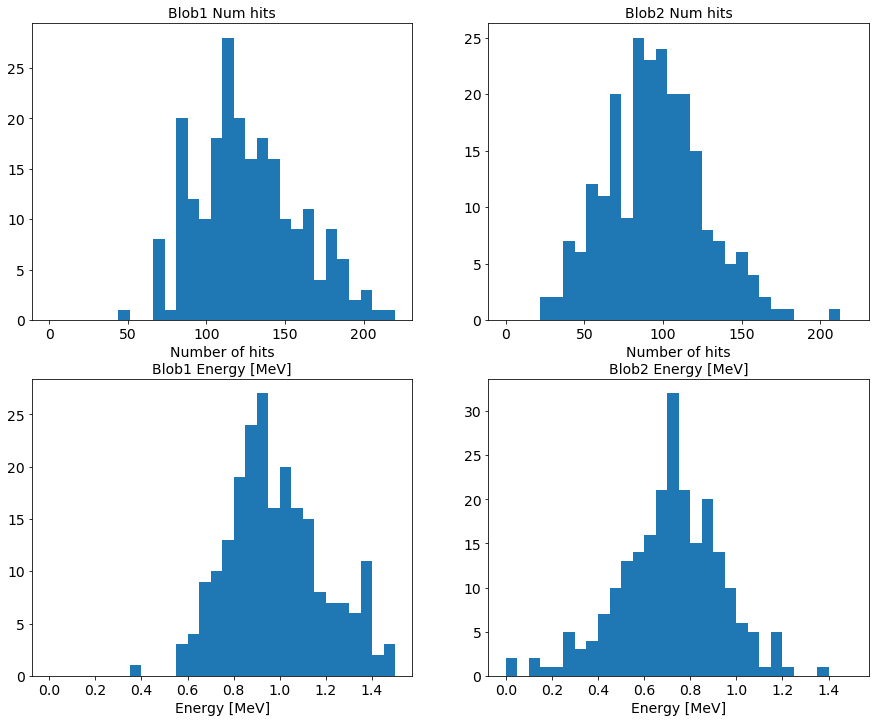

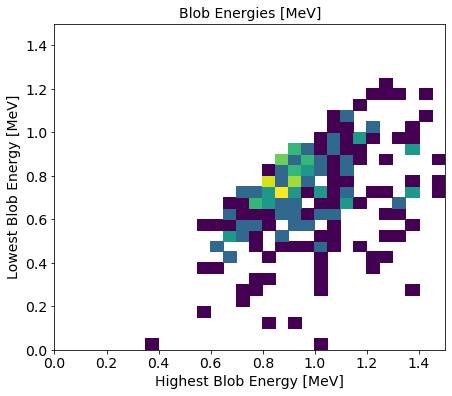

In [22]:
# Plotting blob energies of events passing the track_filter
evts_to_show = events_df[events_df.track_filter]
trks_to_show = tracks_df.loc[evts_to_show.index]

fig = plt.figure(figsize = (15,12))
hit_bins, hit_range = 30, [0., 220]
E_bins, E_range     = 30, [0., 1.50]

ax1 = fig.add_subplot(2, 2, 1)
plt.hist(trks_to_show.blob1_num_hits, hit_bins, hit_range)
plt.xlabel('Number of hits')
plt.title(f'Blob1 Num hits', size=14)

ax2 = fig.add_subplot(2, 2, 2)
plt.hist(trks_to_show.blob2_num_hits, hit_bins, hit_range)
plt.xlabel('Number of hits')
plt.title(f'Blob2 Num hits', size=14)

ax3 = fig.add_subplot(2, 2, 3)
plt.hist(evts_to_show.blob1_energy, E_bins, E_range)
plt.xlabel('Energy [MeV]')
plt.title(f'Blob1 Energy [MeV]', size=14)

ax4 = fig.add_subplot(2, 2, 4)
plt.hist(evts_to_show.blob2_energy, E_bins, E_range)
plt.xlabel('Energy [MeV]')
plt.title(f'Blob2 Energy [MeV]', size=14)

fig = plt.figure(figsize = (7,6))
plt.hist2d(evts_to_show.blob1_energy, evts_to_show.blob2_energy, E_bins,
           [E_range, E_range], norm=LogNorm())
plt.xlabel('Highest Blob Energy [MeV]')
plt.ylabel('Lowest Blob Energy [MeV]')
plt.title(f'Blob Energies [MeV]', size=14)

Text(0.5, 1.0, 'Event Energy')

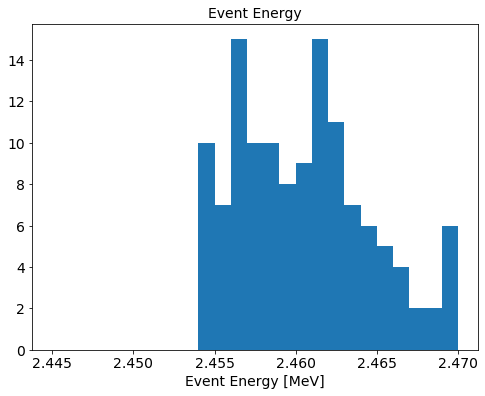

In [23]:
# Plotting event energy of events passing the ROI filter
evts_to_show = events_df[events_df.roi_filter]

E_range = [2.445, 2.470]
E_bins = int((E_range[1] - E_range[0]) / units.keV)

plt.hist(evts_to_show.sm_energy, E_bins, E_range)
plt.xlabel('Event Energy [MeV]')
plt.title((f'Event Energy'), size=14)

# Printing and Plotting

#### Show functions

In [24]:
from fanal.utils.mc_utils    import print_mc_event
from fanal.utils.mc_utils    import plot_mc_event

In [25]:
# Printing DF contents
def print_df_content(event_id):
    print(f"\nPrinting event {event_id} DataFrames contents ...\n")
    # Event data
    print(Event(event_id, **events_df.loc[event_id]))
    
    # Tracks data
    try:
        evt_tracks = tracks_df.loc[event_id]
        print("* Tracks:\n")
        for track_id, track in evt_tracks.iterrows():
            print(Track(event_id, track_id, **evt_tracks.iloc[track_id]))
    except KeyError:
        print("* NO Tracks:\n")
        
    # Voxels data
    try:
        evt_voxels = voxels_df.loc[event_id]
        print("\n* Voxels:")
        #for i, track in evt_tracks.iterrows():
        #    print(Track(event_id, i, **evt_tracks.iloc[i]))
        print(evt_voxels)
    except KeyError:
        print("* NO Voxels:\n")

In [26]:
# Plotting DF contents
def plot_df_content(event_id):
    # TODO
    pass

In [27]:
def show_event(event_id,
               print_mc : bool = True,
               print_df : bool = True,
               plot_mc  : bool = True,
               plot_df  : bool = True
              ):
    print(f"\n\n*** SHOWING EVENT ID: {event_id} ***\n")
    
    if print_mc: print_mc_event(event_id, input_fname, with_hits=False)
    if print_df: print_df_content(event_id)
    if plot_mc : plot_mc_event(event_id, input_fname)
    if plot_df : plot_df_content(event_id)

#### Input MC filename

In [28]:
input_fname = config_df.loc['input_fname'].value
print(f"Input file name: {input_fname}")

Input file name: ../data/next100/bb0nu/sim/*.h5


#### Selecting event ids to show

In [29]:
# Single event
#event_ids = 29

# Events that passed the ROI filter
#event_ids = events_df[events_df.roi_filter].index.tolist()

# Events that passed the energy filter but not the fiducial one
#event_ids = events_df[(events_df.energy_filter == True) &
#                      (events_df.fiduc_filter == False)].index.tolist()

# Events with blob oerlap energy > 0
event_ids = tracks_df[tracks_df.ovlp_energy > 0.].index.get_level_values('event_id').tolist()

In [30]:
print("Event Ids to show:", event_ids)

Event Ids to show: [29, 73, 74, 136, 143, 163, 210, 217, 254, 261, 262, 288, 313, 315, 343, 348, 349, 355, 356, 455, 479, 487, 498]


#### Showing events



*** SHOWING EVENT ID: 29 ***


Event Id: 29  contained in ../data/next100/bb0nu/sim/next100.bb0nu.000.next.h5



*** SHOWING EVENT ID: 73 ***


Event Id: 73  contained in ../data/next100/bb0nu/sim/next100.bb0nu.000.next.h5



*** SHOWING EVENT ID: 74 ***


Event Id: 74  contained in ../data/next100/bb0nu/sim/next100.bb0nu.000.next.h5



*** SHOWING EVENT ID: 136 ***


Event Id: 136  contained in ../data/next100/bb0nu/sim/next100.bb0nu.001.next.h5



*** SHOWING EVENT ID: 143 ***


Event Id: 143  contained in ../data/next100/bb0nu/sim/next100.bb0nu.001.next.h5



*** SHOWING EVENT ID: 163 ***


Event Id: 163  contained in ../data/next100/bb0nu/sim/next100.bb0nu.001.next.h5



*** SHOWING EVENT ID: 210 ***


Event Id: 210  contained in ../data/next100/bb0nu/sim/next100.bb0nu.002.next.h5



*** SHOWING EVENT ID: 217 ***


Event Id: 217  contained in ../data/next100/bb0nu/sim/next100.bb0nu.002.next.h5



*** SHOWING EVENT ID: 254 ***


Event Id: 254  contained in ../data/next100/bb0nu/si

/Users/Javi/Development/FANAL/fanal/utils/mc_utils.py:176: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()




*** SHOWING EVENT ID: 487 ***


Event Id: 487  contained in ../data/next100/bb0nu/sim/next100.bb0nu.004.next.h5



*** SHOWING EVENT ID: 498 ***


Event Id: 498  contained in ../data/next100/bb0nu/sim/next100.bb0nu.004.next.h5



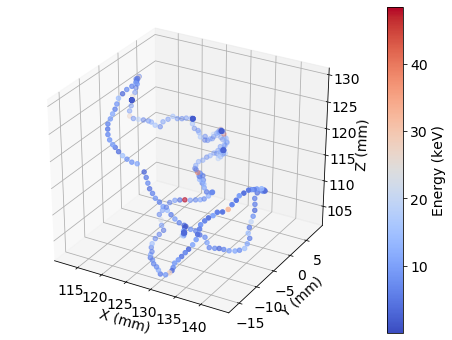

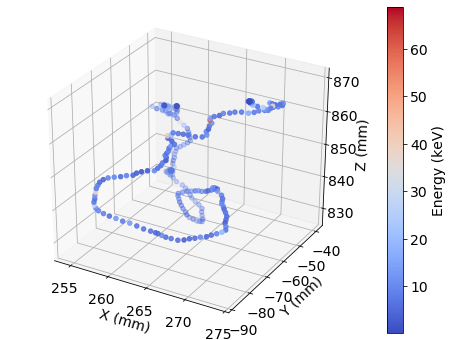

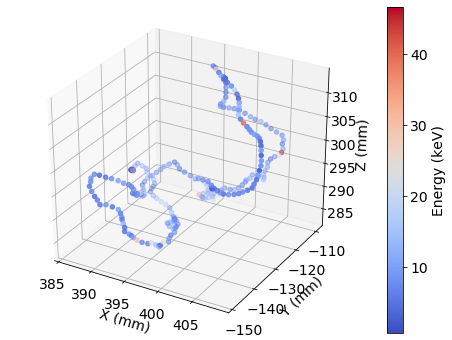

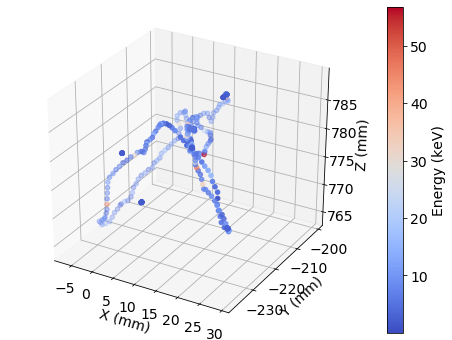

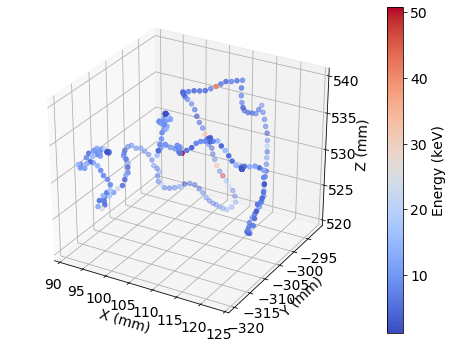

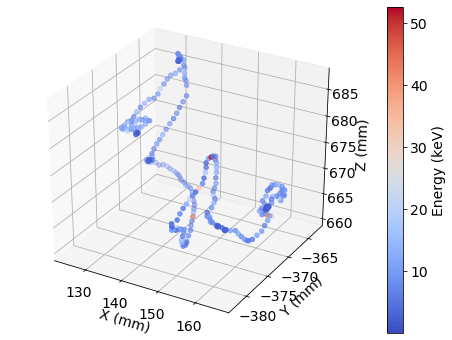

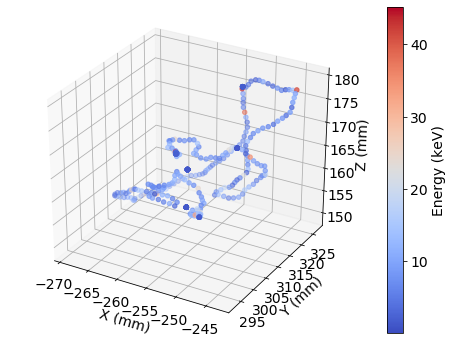

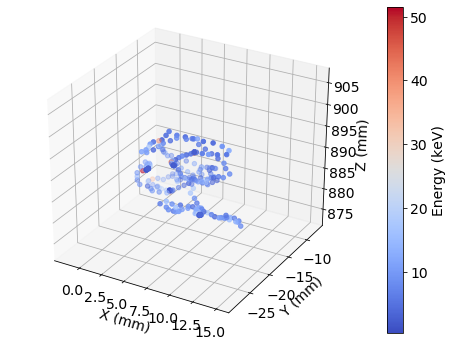

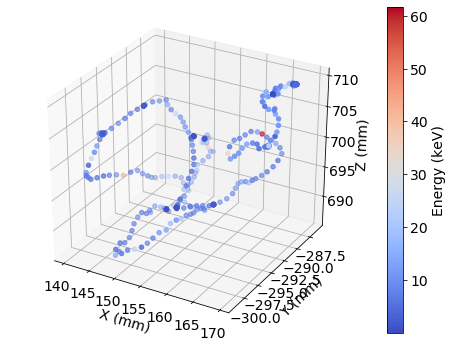

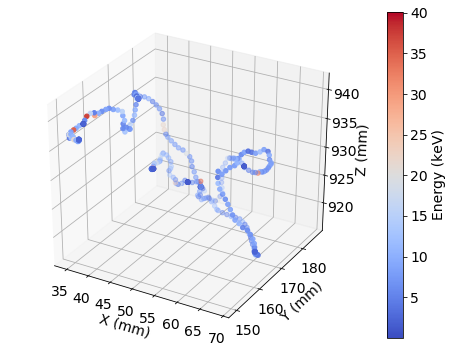

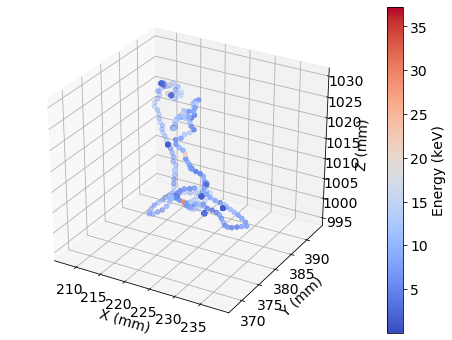

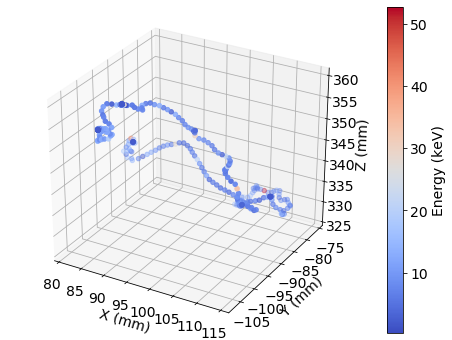

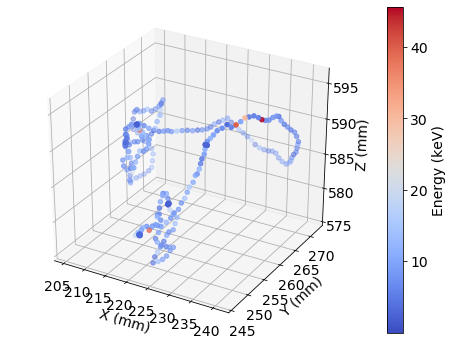

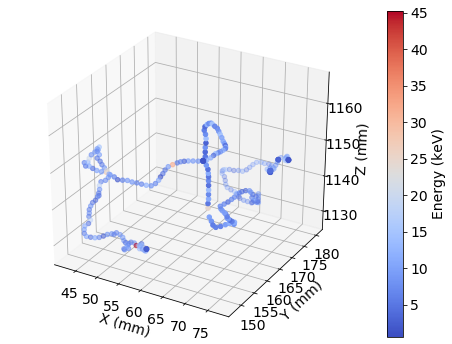

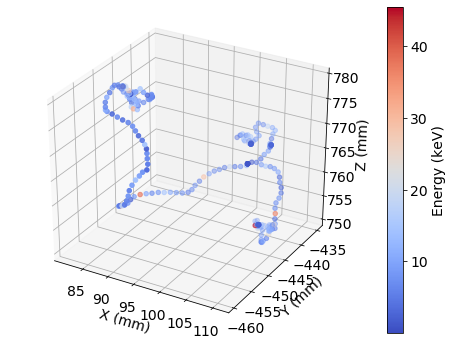

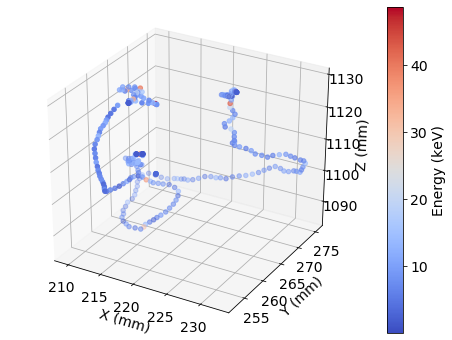

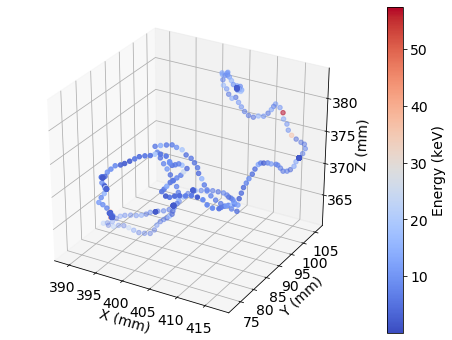

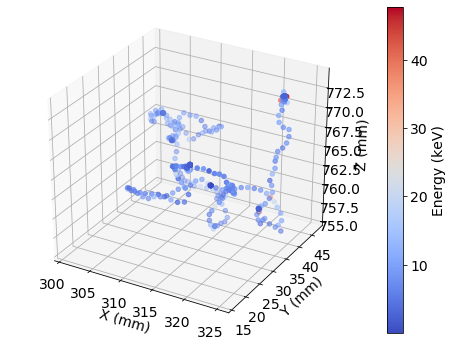

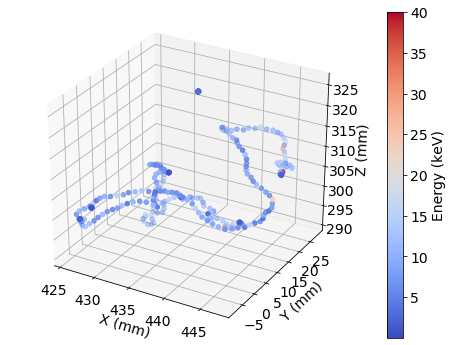

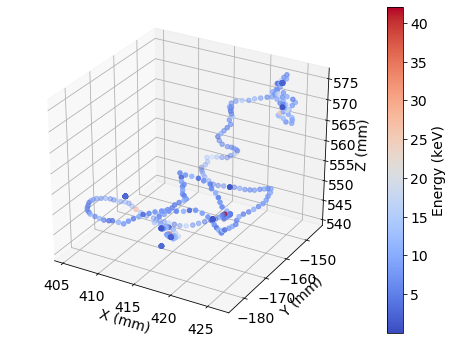

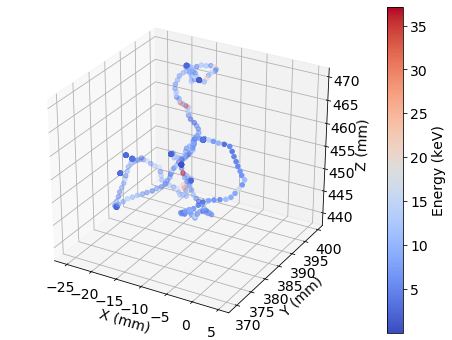

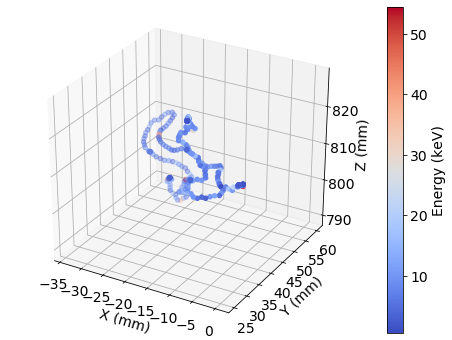

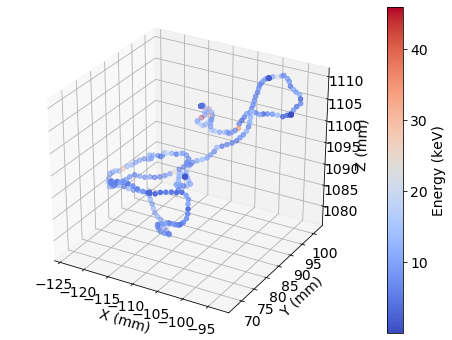

In [31]:
print_mc = False
print_df = False
plot_mc  = True
plot_df  = False

if type(event_ids) == int:
    show_event(event_ids, print_mc, print_df, plot_mc, plot_df)
else:
    for event_id in event_ids:
        show_event(event_id, print_mc, print_df, plot_mc, plot_df)